In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
#engine = create_engine("sqlite:///hawaii.sqlite")
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()
session = Session(engine)

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Keys = Base.classes.keys()
Keys

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
#engine.execute('SELECT * FROM dow LIMIT 5').fetchall()
#session.query(Keys.date).order_by(Keys.date.desc()).first()
session.query(func.max(Measurement.date)).first()

('2017-08-23')

('2017-08-23',)
2016-08-23


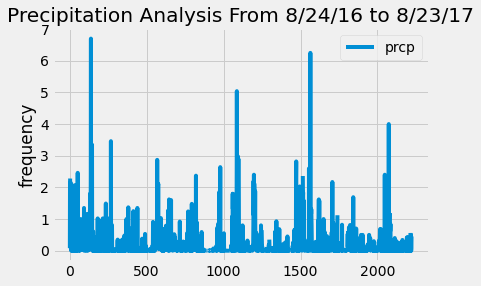

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
closest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(closest_date)
# Calculate the date one year from the last date in data set.
a_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(a_year_ago)

# Perform a query to retrieve the data and precipitation scores
perc_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > a_year_ago).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
perc_df = pd.DataFrame(perc_data)
perc_df

# Sort the dataframe by date
perc_df.set_index('date')

# Use Pandas Plotting with Matplotlib to plot the data
percTab = perc_df.plot()#figsize=(10,4))
percTab.set_title("Precipitation Analysis From 8/24/16 to 8/23/17")
percTab.set_ylabel('frequency')
plt.show()



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
perc_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
locations = session.query(Measurement).group_by(Measurement.station).count()
print(locations)

9


In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
count_stat = func.count(Measurement.station).label('count')
active_loc = session.query(Measurement.station, count_stat).\
            group_by(Measurement.station).\
            order_by(count_stat.desc()).all()
active_loc

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
#temp
#session.query(*temp).filter(Measurement.station).all()
session.query(*temp).filter(Measurement.station).first()

(None, None, None)

In [30]:
# Using the most active station id

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()